##**Importing all requisite libraries:-**

In [ ]:
!pip install catboost
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.layers import Input, Dense, Dropout
from keras.models import Model
import random
import scipy.stats
import os
import tensorflow as tf
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


## **Loading of data into the DataFrame:-**

In [ ]:
train=pd.read_csv(r"train_IxoE5JN.csv")
train.head()

row_id             datetime       energy
0       1  2008-03-01 00:00:00  1259.985563
1       2  2008-03-01 01:00:00  1095.541500
2       3  2008-03-01 02:00:00  1056.247500
3       4  2008-03-01 03:00:00  1034.742000
4       5  2008-03-01 04:00:00  1026.334500

In [ ]:
train

row_id             datetime       energy
0           1  2008-03-01 00:00:00  1259.985563
1           2  2008-03-01 01:00:00  1095.541500
2           3  2008-03-01 02:00:00  1056.247500
3           4  2008-03-01 03:00:00  1034.742000
4           5  2008-03-01 04:00:00  1026.334500
...       ...                  ...          ...
94987   94988  2018-12-31 19:00:00  2528.446800
94988   94989  2018-12-31 20:00:00  2461.883600
94989   94990  2018-12-31 21:00:00  2365.994400
94990   94991  2018-12-31 22:00:00  2342.942800
94991   94992  2018-12-31 23:00:00  2180.217600

[94992 rows x 3 columns]

## **Splitting of datetime into seperate columns:-**

In [ ]:
test = pd.read_csv(r"test_WudNWDM.csv",parse_dates=['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] =test['datetime'].dt.month
test['day'] =test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour



In [ ]:
test.head()

row_id            datetime  year  month  day  hour
0   94993 2019-01-01 00:00:00  2019      1    1     0
1   94994 2019-01-01 01:00:00  2019      1    1     1
2   94995 2019-01-01 02:00:00  2019      1    1     2
3   94996 2019-01-01 03:00:00  2019      1    1     3
4   94997 2019-01-01 04:00:00  2019      1    1     4

In [ ]:
test.isna().sum()

row_id      0
datetime    0
year        0
month       0
day         0
hour        0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    26304 non-null  int64         
 1   datetime  26304 non-null  datetime64[ns]
 2   year      26304 non-null  int64         
 3   month     26304 non-null  int64         
 4   day       26304 non-null  int64         
 5   hour      26304 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.2 MB


In [ ]:
test

row_id            datetime  year  month  day  hour
0       94993 2019-01-01 00:00:00  2019      1    1     0
1       94994 2019-01-01 01:00:00  2019      1    1     1
2       94995 2019-01-01 02:00:00  2019      1    1     2
3       94996 2019-01-01 03:00:00  2019      1    1     3
4       94997 2019-01-01 04:00:00  2019      1    1     4
...       ...                 ...   ...    ...  ...   ...
26299  121292 2021-12-31 19:00:00  2021     12   31    19
26300  121293 2021-12-31 20:00:00  2021     12   31    20
26301  121294 2021-12-31 21:00:00  2021     12   31    21
26302  121295 2021-12-31 22:00:00  2021     12   31    22
26303  121296 2021-12-31 23:00:00  2021     12   31    23

[26304 rows x 6 columns]

In [ ]:
train = pd.read_csv(r"train_IxoE5JN.csv",parse_dates=['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour



In [ ]:
train.head()

row_id            datetime       energy  year  month  day  hour
0       1 2008-03-01 00:00:00  1259.985563  2008      3    1     0
1       2 2008-03-01 01:00:00  1095.541500  2008      3    1     1
2       3 2008-03-01 02:00:00  1056.247500  2008      3    1     2
3       4 2008-03-01 03:00:00  1034.742000  2008      3    1     3
4       5 2008-03-01 04:00:00  1026.334500  2008      3    1     4

In [ ]:
train.describe()

row_id        energy          year         month           day  \
count  94992.000000  93092.000000  94992.000000  94992.000000  94992.000000   
mean   47496.500000   1702.995014   2013.075038      6.599040     15.733704   
std    27421.972723    369.322103      3.125436      3.417591      8.802197   
min        1.000000    866.388600   2008.000000      1.000000      1.000000   
25%    23748.750000   1431.541100   2010.000000      4.000000      8.000000   
50%    47496.500000   1654.465800   2013.000000      7.000000     16.000000   
75%    71244.250000   1935.993450   2016.000000     10.000000     23.000000   
max    94992.000000   3374.399600   2018.000000     12.000000     31.000000   

               hour  
count  94992.000000  
mean      11.500000  
std        6.922223  
min        0.000000  
25%        5.750000  
50%       11.500000  
75%       17.250000  
max       23.000000

## **Data Cleaning:-**

In [ ]:
train.isna().sum()

row_id         0
datetime       0
energy      1900
year           0
month          0
day            0
hour           0
dtype: int64

In [ ]:
df=train.copy()

In [ ]:
df=df.drop(['datetime'], axis=1)

## **Arranging in proper sequnence i.e. target column at last:**-

In [ ]:
df1=df.iloc[:,0:1]
df2=df.iloc[:,2:6]
df3=df.iloc[:,1:2]
res=pd.concat([df1,df2,df3], axis=1)

In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  94992 non-null  int64  
 1   year    94992 non-null  int64  
 2   month   94992 non-null  int64  
 3   day     94992 non-null  int64  
 4   hour    94992 non-null  int64  
 5   energy  93092 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 4.3 MB


In [ ]:
res.isna().sum()

row_id       0
year         0
month        0
day          0
hour         0
energy    1900
dtype: int64

In [ ]:
#from sklearn.preprocessing import MinMaxScaler


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler



# Define scaler to set values between 0 and 1

df_knn = res.filter(['year','month','day','hour'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)


In [ ]:
res1=df_knn.copy()

In [ ]:
res1.head(50)

year     month       day      hour
0    0.0  0.181818  0.000000  0.000000
1    0.0  0.181818  0.000000  0.043478
2    0.0  0.181818  0.000000  0.086957
3    0.0  0.181818  0.000000  0.130435
4    0.0  0.181818  0.000000  0.173913
5    0.0  0.181818  0.000000  0.217391
6    0.0  0.181818  0.000000  0.260870
7    0.0  0.181818  0.000000  0.304348
8    0.0  0.181818  0.000000  0.347826
9    0.0  0.181818  0.000000  0.391304
10   0.0  0.181818  0.000000  0.434783
11   0.0  0.181818  0.000000  0.478261
12   0.0  0.181818  0.000000  0.521739
13   0.0  0.181818  0.000000  0.565217
14   0.0  0.181818  0.000000  0.608696
15   0.0  0.181818  0.000000  0.652174
16   0.0  0.181818  0.000000  0.695652
17   0.0  0.181818  0.000000  0.739130
18   0.0  0.181818  0.000000  0.782609
19   0.0  0.181818  0.000000  0.826087
20   0.0  0.181818  0.000000  0.869565
21   0.0  0.181818  0.000000  0.913043
22   0.0  0.181818  0.000000  0.956522
23   0.0  0.181818  0.000000  1.000000
24   0.0  0.181818  0.033333  0.000000
25   0.0  0.181818  0.033333  0.043478
26   0.0  0.181818  0.033333  0.086957
27   0.0  0.181818  0.033333  0.130435
28   0.0  0.181818  0.033333  0.173913
29   0.0  0.181818  0.033333  0.217391
30   0.0  0.181818  0.033333  0.260870
31   0.0  0.181818  0.033333  0.304348
32   0.0  0.181818  0.033333  0.347826
33   0.0  0.181818  0.033333  0.391304
34   0.0  0.181818  0.033333  0.434783
35   0.0  0.181818  0.033333  0.478261
36   0.0  0.181818  0.033333  0.521739
37   0.0  0.181818  0.033333  0.565217
38   0.0  0.181818  0.033333  0.608696
39   0.0  0.181818  0.033333  0.652174
40   0.0  0.181818  0.033333  0.695652
41   0.0  0.181818  0.033333  0.739130
42   0.0  0.181818  0.033333  0.782609
43   0.0  0.181818  0.033333  0.826087
44   0.0  0.181818  0.033333  0.869565
45   0.0  0.181818  0.033333  0.913043
46   0.0  0.181818  0.033333  0.956522
47   0.0  0.181818  0.033333  1.000000
48   0.0  0.181818  0.066667  0.000000
49   0.0  0.181818  0.066667  0.043478

In [ ]:
res1["year"].value_counts()

0.4    8784
0.8    8784
0.1    8760
0.2    8760
0.3    8760
0.5    8760
0.6    8760
0.7    8760
0.9    8760
1.0    8760
0.0    7344
Name: year, dtype: int64

In [ ]:
res1["month"].value_counts()

0.181818    8184
0.363636    8184
0.545455    8184
0.636364    8184
0.818182    8184
1.000000    8184
0.272727    7920
0.454545    7920
0.727273    7920
0.909091    7920
0.000000    7440
0.090909    6768
Name: month, dtype: int64

In [ ]:
res1["day"].value_counts()

0.000000    3120
0.033333    3120
0.900000    3120
0.866667    3120
0.833333    3120
0.800000    3120
0.766667    3120
0.733333    3120
0.700000    3120
0.666667    3120
0.633333    3120
0.600000    3120
0.566667    3120
0.533333    3120
0.500000    3120
0.466667    3120
0.433333    3120
0.400000    3120
0.366667    3120
0.333333    3120
0.300000    3120
0.266667    3120
0.233333    3120
0.200000    3120
0.166667    3120
0.133333    3120
0.100000    3120
0.066667    3120
0.933333    2928
0.966667    2880
1.000000    1824
Name: day, dtype: int64

In [ ]:
res1["hour"].value_counts()

0.000000    3958
0.043478    3958
0.956522    3958
0.913043    3958
0.869565    3958
0.826087    3958
0.782609    3958
0.739130    3958
0.695652    3958
0.652174    3958
0.608696    3958
0.565217    3958
0.521739    3958
0.478261    3958
0.434783    3958
0.391304    3958
0.347826    3958
0.304348    3958
0.260870    3958
0.217391    3958
0.173913    3958
0.130435    3958
0.086957    3958
1.000000    3958
Name: hour, dtype: int64

In [ ]:
#res1=res1.drop(['row_id'], axis=1)

In [ ]:
#res=res.dropna()

In [ ]:
#res.isna().sum()

In [ ]:
#res=res.drop(['row_id'], axis=1)

In [ ]:
#res

##**Iterative Imputer:**-

In [ ]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

df_mice =  res.filter(['year','month','day','hour','energy'], axis=1).copy()


# Define MICE Imputer and fill missing values
# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=11), n_nearest_features=None,max_iter=1000, tol=0.0001,initial_strategy='mean', imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

In [ ]:
df_mice_imputed

year  month   day  hour       energy
0      2008.0    3.0   1.0   0.0  1259.985563
1      2008.0    3.0   1.0   1.0  1095.541500
2      2008.0    3.0   1.0   2.0  1056.247500
3      2008.0    3.0   1.0   3.0  1034.742000
4      2008.0    3.0   1.0   4.0  1026.334500
...       ...    ...   ...   ...          ...
94987  2018.0   12.0  31.0  19.0  2528.446800
94988  2018.0   12.0  31.0  20.0  2461.883600
94989  2018.0   12.0  31.0  21.0  2365.994400
94990  2018.0   12.0  31.0  22.0  2342.942800
94991  2018.0   12.0  31.0  23.0  2180.217600

[94992 rows x 5 columns]

In [ ]:
df_mice_imputed['year'] = df_mice_imputed['year'].astype(int)
df_mice_imputed['month'] = df_mice_imputed['month'].astype(int)
df_mice_imputed['day'] = df_mice_imputed['day'].astype(int)
df_mice_imputed['hour'] = df_mice_imputed['hour'].astype(int)
#df_mice_imputed['row_id'] = df_mice_imputed['row_id'].astype(int)

In [ ]:
df_mice_imputed.isna().sum()

year      0
month     0
day       0
hour      0
energy    0
dtype: int64

In [ ]:
#res=df_mice_imputed.drop(['row_id'],axis=1)

In [ ]:
#res1

In [ ]:
res=df_mice_imputed.copy()

In [ ]:
res

year  month  day  hour       energy
0      2008      3    1     0  1259.985563
1      2008      3    1     1  1095.541500
2      2008      3    1     2  1056.247500
3      2008      3    1     3  1034.742000
4      2008      3    1     4  1026.334500
...     ...    ...  ...   ...          ...
94987  2018     12   31    19  2528.446800
94988  2018     12   31    20  2461.883600
94989  2018     12   31    21  2365.994400
94990  2018     12   31    22  2342.942800
94991  2018     12   31    23  2180.217600

[94992 rows x 5 columns]

In [ ]:
#res1.isna().sum()

In [ ]:
res.isna().sum()

year      0
month     0
day       0
hour      0
energy    0
dtype: int64

In [ ]:
#res2=res.copy()

In [ ]:
#res2=res2.drop(['row_id'], axis=1)

##**KNN Imputer:**-

In [ ]:
'''# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler



# Define scaler to set values between 0 and 1

df_knn = res.filter(['row_id','year','month','day','hour','energy'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)'''

In [ ]:
#df_knn_imputed

##**Forward & Backward Fill:**-

In [ ]:
#res=res.fillna(method='ffill').fillna(method='bfill')
#res

In [ ]:
#res.isna().sum()

## **Train-Test Split:-**

In [ ]:
#X = res1.drop(['energy'], axis=1)
#y = res1['energy']

In [ ]:
X = res.drop(['energy'], axis=1)
y = res['energy']

In [ ]:
#X=df_knn.copy()
#y=res['energy']

In [ ]:
#X = df_knn_imputed.drop(['energy'], axis=1)
#y = df_knn_imputed['energy']

In [ ]:
X.isna().sum()

year     0
month    0
day      0
hour     0
dtype: int64

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
y.isna().sum()

0

In [ ]:
type(y)

pandas.core.series.Series

#**Series to DataFrame Conversion**: 

In [ ]:
#y=y.to_frame()

In [ ]:
#type(y)

pandas.core.frame.DataFrame

In [ ]:
y.isna().sum()

0

In [ ]:
X = res1.copy()
y = y.copy()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2022, test_size=0.155)


In [ ]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((80268, 4), (14724, 4), (80268,), (14724,))

In [ ]:
y_train.isna().sum()

0

In [ ]:
y_train.shape

(80268,)

In [ ]:
y_train

13784    1479.6808
23858    1225.1919
79326    1427.6250
44282    1394.8172
77159    2033.4456
           ...    
71920    1839.3544
46769    1711.6792
16557    1788.4854
1244     1321.9245
86909    1561.3024
Name: energy, Length: 80268, dtype: float64

In [ ]:
y_train = y_train.values.reshape(-1,1)

In [ ]:
y_val = y_val.values.reshape(-1,1)

##**Normalizing the samples:**-

In [ ]:
target_scaler = MinMaxScaler()
target_scaler.fit(y_train)

MinMaxScaler()

In [ ]:
train_y = target_scaler.transform(y_train)
test_y = target_scaler.transform(y_val)

In [ ]:
train_y

array([[0.2445333 ],
       [0.14306289],
       [0.22377749],
       ...,
       [0.36766059],
       [0.18163234],
       [0.27707765]])

In [ ]:
test_y

array([[0.24765968],
       [0.13237179],
       [0.44189033],
       ...,
       [0.39506533],
       [0.1322981 ],
       [0.17061644]])

In [ ]:
type(train_y)

numpy.ndarray

In [ ]:
train_y

array([[0.2445333 ],
       [0.14306289],
       [0.22377749],
       ...,
       [0.36766059],
       [0.18163234],
       [0.27707765]])

In [ ]:
y_train = train_y.copy()
y_val = test_y.copy()

In [ ]:
y_train

array([[0.2445333 ],
       [0.14306289],
       [0.22377749],
       ...,
       [0.36766059],
       [0.18163234],
       [0.27707765]])

In [ ]:
y_train.shape

(80268, 1)

In [ ]:
a=y_train.ravel()

In [ ]:
a

array([0.2445333 , 0.14306289, 0.22377749, ..., 0.36766059, 0.18163234,
       0.27707765])

In [ ]:
a.shape

(80268,)

In [ ]:
b=y_val.ravel()

In [ ]:
b.shape

(14724,)

# **Different Machine Learning Models:**-

# **1. Linear Regression:**-

In [ ]:
model = LinearRegression()
model.fit(X_train,a)

print("Test R^2 Score: {:.5f}".format(model.score(X_val, b)))

Test R^2 Score: 0.49253


# **2. Random Forest:**-

In [ ]:
import numpy as np
import pandas as pd
df1 = pd.DataFrame(y_train, columns = ['energy'])

In [ ]:
df2= pd.DataFrame(y_val, columns = ['energy'])

In [ ]:
regr = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 101)
regr.fit(X_train, df1.values.ravel())

RandomForestRegressor(max_depth=4, random_state=101)

In [ ]:
predictions = regr.predict(X_val)


In [ ]:
mae = mean_absolute_error(df2.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(df2.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(df2.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 0.07
Mean Squared Error: 0.01
R-squared scores: 0.61


# **3. CatBoost:**-

In [ ]:
#X_train

In [ ]:
#y_train

In [ ]:
#df1 = pd.DataFrame(y_train, columns = ['energy'])

In [ ]:
#df1

In [ ]:
model2=CatBoostRegressor()
model2.fit(X_train, a )
print("Test R^2 Score: {:.5f}".format(model2.score(X_val, b )))


Learning rate set to 0.081865
0:	learn: 0.1397221	total: 36.7ms	remaining: 36.7s
1:	learn: 0.1329690	total: 77.6ms	remaining: 38.7s
2:	learn: 0.1270015	total: 108ms	remaining: 35.8s
3:	learn: 0.1216482	total: 145ms	remaining: 36.1s
4:	learn: 0.1170287	total: 178ms	remaining: 35.4s
5:	learn: 0.1127167	total: 210ms	remaining: 34.7s
6:	learn: 0.1089331	total: 223ms	remaining: 31.6s
7:	learn: 0.1053554	total: 234ms	remaining: 29s
8:	learn: 0.1021249	total: 248ms	remaining: 27.3s
9:	learn: 0.0995414	total: 262ms	remaining: 25.9s
10:	learn: 0.0973520	total: 274ms	remaining: 24.6s
11:	learn: 0.0950171	total: 285ms	remaining: 23.5s
12:	learn: 0.0930762	total: 296ms	remaining: 22.5s
13:	learn: 0.0913035	total: 309ms	remaining: 21.7s
14:	learn: 0.0896034	total: 320ms	remaining: 21s
15:	learn: 0.0881287	total: 331ms	remaining: 20.4s
16:	learn: 0.0867032	total: 347ms	remaining: 20.1s
17:	learn: 0.0857040	total: 358ms	remaining: 19.5s
18:	learn: 0.0846976	total: 370ms	remaining: 19.1s
19:	learn: 0.

# **4. XGBoost:**-

In [ ]:
def XGBoost(X_train,X_val,y_train,y_test):
    dtrain = xgb.DMatrix(X_train,label=y_train)
    dtest = xgb.DMatrix(X_val,label=y_test)
    return xgb.train(params={'objective':'reg:squarederror','eval_metric':'rmse', 'max_depth':7, 'colsample_bytree':0.9, 'gamma':1}
                    ,dtrain=dtrain,num_boost_round=36, 
                    early_stopping_rounds=5,evals=[(dtest,'test')])

In [ ]:
xgb_model = XGBoost(X_train, X_val,a,b)

[0]	test-rmse:0.17683
Will train until test-rmse hasn't improved in 5 rounds.
[1]	test-rmse:0.13854
[2]	test-rmse:0.110934
[3]	test-rmse:0.092208
[4]	test-rmse:0.082184
[5]	test-rmse:0.077043
[6]	test-rmse:0.073299
[7]	test-rmse:0.069922
[8]	test-rmse:0.068148
[9]	test-rmse:0.067367
[10]	test-rmse:0.066663
[11]	test-rmse:0.065585
[12]	test-rmse:0.065104
[13]	test-rmse:0.064974
[14]	test-rmse:0.06466
[15]	test-rmse:0.064538
[16]	test-rmse:0.064098
[17]	test-rmse:0.064097
[18]	test-rmse:0.064097
[19]	test-rmse:0.064097
[20]	test-rmse:0.064098
[21]	test-rmse:0.064097
[22]	test-rmse:0.064003
[23]	test-rmse:0.064003
[24]	test-rmse:0.064003
[25]	test-rmse:0.064003
[26]	test-rmse:0.064003
[27]	test-rmse:0.064003
Stopping. Best iteration:
[22]	test-rmse:0.064003



In [ ]:
y_train_pred = xgb_model.predict(xgb.DMatrix(X_train), ntree_limit = xgb_model.best_iteration)
y_val_pred = xgb_model.predict(xgb.DMatrix(X_val), ntree_limit = xgb_model.best_iteration)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

## **Best iteration values:**-

In [ ]:
print("Train set error: ", np.sqrt(mse(y_train, y_train_pred)))
print("Validation set error: ", np.sqrt(mse(y_val, y_val_pred)))

Train set error:  0.06455679747597685
Validation set error:  0.06409749382147913


##**Decision Tree:**-

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
dtc=DecisionTreeRegressor(random_state=2022)
dtc.fit(X_train, y_train)
print("Test R^2 Score: {:.5f}".format(dtc.score(X_val, y_val)))

Test R^2 Score: 0.94721


## **Prediction from test data:**-

In [ ]:
test_key = test['datetime']
x_pred = test.drop(columns=['datetime'])


In [ ]:
x_pred

row_id  year  month  day  hour
0       94993  2019      1    1     0
1       94994  2019      1    1     1
2       94995  2019      1    1     2
3       94996  2019      1    1     3
4       94997  2019      1    1     4
...       ...   ...    ...  ...   ...
26299  121292  2021     12   31    19
26300  121293  2021     12   31    20
26301  121294  2021     12   31    21
26302  121295  2021     12   31    22
26303  121296  2021     12   31    23

[26304 rows x 5 columns]

In [ ]:
xgb_model

In [ ]:
x1=x_pred.drop(['row_id'], axis=1)

In [ ]:
x1

year  month  day  hour
0      2019      1    1     0
1      2019      1    1     1
2      2019      1    1     2
3      2019      1    1     3
4      2019      1    1     4
...     ...    ...  ...   ...
26299  2021     12   31    19
26300  2021     12   31    20
26301  2021     12   31    21
26302  2021     12   31    22
26303  2021     12   31    23

[26304 rows x 4 columns]

In [ ]:
#prediction_pr = xgb_model.predict(xgb.DMatrix(x_pred))

In [ ]:
prediction_pr = xgb_model.predict(xgb.DMatrix(x1))

In [ ]:
prediction_pr

array([0.40614894, 0.53523713, 0.53523713, ..., 0.53523713, 0.53523713,
       0.53523713], dtype=float32)

In [ ]:
prediction_pr.shape

(26304,)

In [ ]:
a=prediction_pr.reshape(-1,1)

In [ ]:
#prediction_pr = xgb_model.predict(xgb.DMatrix(x_pred))

In [ ]:
yhat = target_scaler.inverse_transform(a)

In [ ]:
prediction_1 = yhat.round(2)


In [ ]:
prediction_1

array([[1885.01],
       [2208.77],
       [2208.77],
       ...,
       [2208.77],
       [2208.77],
       [2208.77]], dtype=float32)

In [ ]:
#prediction_1 = prediction_pr.round(2)

In [ ]:
#prediction_1

In [ ]:
#prediction_pr = gcv.predict((x1))

In [ ]:
#prediction_1 = prediction_pr.round(2)

In [ ]:
#prediction_pr = dtc.predict((x1))

In [ ]:
#prediction_1 = prediction_pr.round(2)

In [ ]:
#prediction_pr = model.predict((x_pred))

In [ ]:
#prediction_1 = prediction_pr.round(2)

In [ ]:
#prediction_1

## **Submission of requisite file:**-

In [ ]:
submission = pd.read_csv(r"sample_submission_jn0a7vR.csv")

In [ ]:
submission['energy']=prediction_1

In [ ]:
submission

row_id      energy
0       94993  1885.01001
1       94994  2208.77002
2       94995  2208.77002
3       94996  2208.77002
4       94997  2208.77002
...       ...         ...
26299  121292  2208.77002
26300  121293  2208.77002
26301  121294  2208.77002
26302  121295  2208.77002
26303  121296  2208.77002

[26304 rows x 2 columns]

In [ ]:
submission.to_csv("submission.csv",index=False)

## **XGboost Feature Importance:**-

Plotting Feature Importance


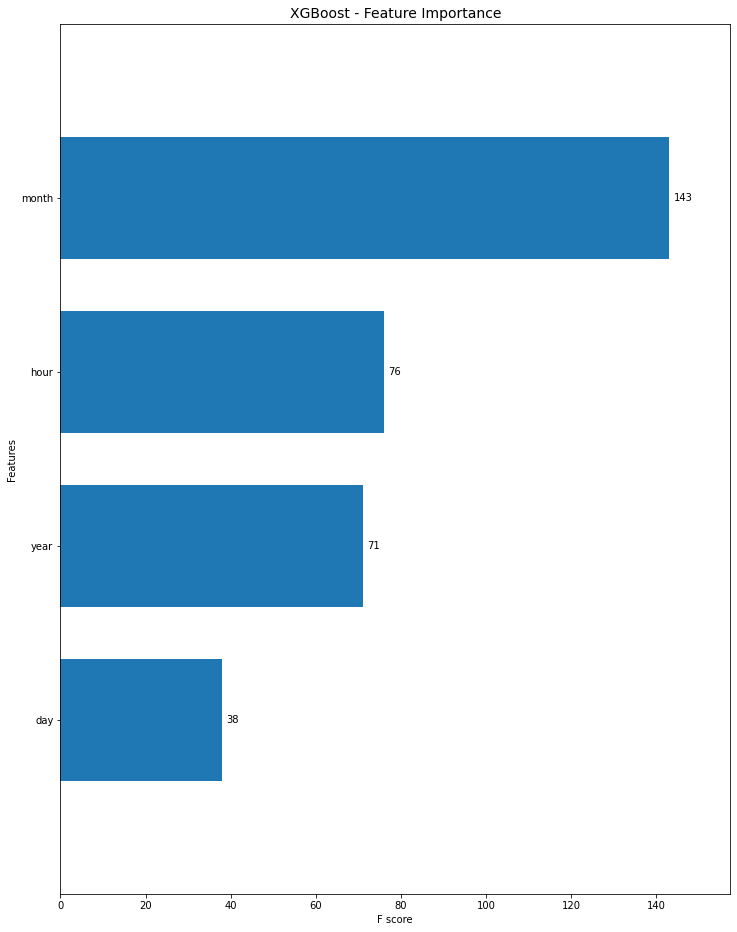

In [ ]:
print('Plotting Feature Importance')
fig, ax = plt.subplots(figsize=(12,16))
xgb.plot_importance(xgb_model, height=0.7, ax=ax)
ax.grid(False)
plt.title("XGBoost - Feature Importance", fontsize=14)
plt.show()